In [2]:
# ZJZ twitter sentiment analysis

In [11]:
# import
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [12]:
accessToken='1393886621729271815-MSUMYiX5E7dOqv688WtlRDL861LVEg'
accessTokenSecret='kRPXGNrEecnKUTg1n0Xm4nxFQ22loyuoKkFdbjzSYdskM'
consumerKey='JR6B8K1QWpYeMqMKYAiGkIF3l'
consumerSecret='A83zp1kFCtrBTNmpwNnxXWRLRTsSshmRkRkl9MV29Bu7DYkBZm'
auth = tweepy.OAuthHandler(consumerKey,consumerSecret)
auth.set_access_token(accessToken,accessTokenSecret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [13]:
# get n tweets from Elon Musk, n=10 
posts = api.user_timeline(screen_name='ElonMusk',count=10,lang="en",tweet_mode="extended")
print("show the n recent tweets:\n")
i = 0
for tweet in posts[0:10]:
  i+=1
  print(str(i)+')'+tweet.full_text+'\n')

show the n recent tweets:

1)@SawyerMerritt New UAW slogan: “Fighting for their right to steal money from workers!”

2)@Rainmaker1973 🔥🔥

3)@Rainmaker1973 Interestingly, however, average power density of the sun is comparable to a compost heap (humans are more power dense than the sun) – it is just very, very big

4)@SawyerMerritt There are many other good causes, but this is my main reason for accumulating capital. 

The resources I consume personally are very low.

5)@Tenjin37151 @Space_Station @SpaceX @Commercial_Crew @NASA @esa @JAXA_en @astro_kimbrough @Astro_Megan @Thom_astro @Aki_Hoshide As described in The Moon is a Harsh Mistress (great book), a linear accelerator would be great for the moon. 

Earth’s gravity is too high &amp; atmosphere too dense for accelerators to be a good solution vs reusable boosters imo.

6)@Space_Station @SpaceX @Commercial_Crew @NASA @esa @JAXA_en @astro_kimbrough @Astro_Megan @Thom_astro @Aki_Hoshide Still blows my mind that this is real

7)@Rainmak

In [14]:
df = pd.DataFrame([tweet.full_text for tweet in posts],columns=['Tweets'])
df.head()

,Tweets
0,@SawyerMerritt New UAW slogan: “Fighting for t...
1,@Rainmaker1973 🔥🔥
2,"@Rainmaker1973 Interestingly, however, average..."
3,@SawyerMerritt There are many other good cause...
4,@Tenjin37151 @Space_Station @SpaceX @Commercia...


In [15]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+','',text)
  text = re.sub(r'#','',text)
  text = re.sub(r'RT[\s]+','',text)
  text = re.sub(r'https:\/\/S+','',text)
  return(text)

df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,New UAW slogan: “Fighting for their right to ...
1,🔥🔥
2,"Interestingly, however, average power density..."
3,"There are many other good causes, but this is..."
4,_Station _Crew _en _kimbrough _Megan _astr...
5,_Station _Crew _en _kimbrough _Megan _astro...
6,And that is a very tiny fraction of the ~4 me...
7,": Jupiter, Saturn, the Moon, and Venus above F..."
8,Sometimes they’re a little 2-dimensional https...
9,I have all their albums https://t.co/OwQaSJADDE


In [16]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Subjectivity,Polarity
0,New UAW slogan: “Fighting for their right to ...,0.495130,0.246753
1,🔥🔥,0.000000,0.000000
2,"Interestingly, however, average power density...",0.382500,0.212500
3,"There are many other good causes, but this is...",0.416389,0.206944
4,_Station _Crew _en _kimbrough _Megan _astr...,0.668000,0.452000
5,_Station _Crew _en _kimbrough _Megan _astro...,0.300000,0.200000
6,And that is a very tiny fraction of the ~4 me...,0.325000,0.000000
7,": Jupiter, Saturn, the Moon, and Venus above F...",0.100000,0.000000
8,Sometimes they’re a little 2-dimensional https...,0.500000,-0.187500
9,I have all their albums https://t.co/OwQaSJADDE,0.000000,0.000000


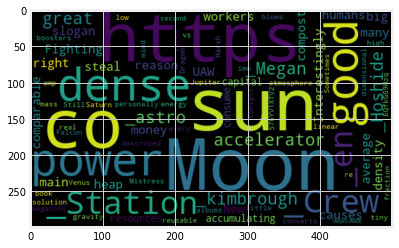

In [18]:
# word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500,height = 300, random_state=80, max_font_size=100).generate(allWords)
plt.imshow(wordCloud,interpolation='bilinear')
plt.show()

In [19]:
#NLP part
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score==0:
    return 'Middle'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,New UAW slogan: “Fighting for their right to ...,0.495130,0.246753,Positive
1,🔥🔥,0.000000,0.000000,Middle
2,"Interestingly, however, average power density...",0.382500,0.212500,Positive
3,"There are many other good causes, but this is...",0.416389,0.206944,Positive
4,_Station _Crew _en _kimbrough _Megan _astr...,0.668000,0.452000,Positive
5,_Station _Crew _en _kimbrough _Megan _astro...,0.300000,0.200000,Positive
6,And that is a very tiny fraction of the ~4 me...,0.325000,0.000000,Middle
7,": Jupiter, Saturn, the Moon, and Venus above F...",0.100000,0.000000,Middle
8,Sometimes they’re a little 2-dimensional https...,0.500000,-0.187500,Negative
9,I have all their albums https://t.co/OwQaSJADDE,0.000000,0.000000,Middle


In [20]:
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Positive'):
    print(str(j)+')'+sortedDF['Tweets'][i])
    print()
    j=j+1

1) New UAW slogan: “Fighting for their right to steal money from workers!”

2) Interestingly, however, average power density of the sun is comparable to a compost heap (humans are more power dense than the sun) – it is just very, very big

3) There are many other good causes, but this is my main reason for accumulating capital. 

The resources I consume personally are very low.

4) _Station  _Crew   _en _kimbrough _Megan _astro _Hoshide As described in The Moon is a Harsh Mistress (great book), a linear accelerator would be great for the moon. 

Earth’s gravity is too high &amp; atmosphere too dense for accelerators to be a good solution vs reusable boosters imo.

5)_Station  _Crew   _en _kimbrough _Megan _astro _Hoshide Still blows my mind that this is real



<function matplotlib.pyplot.show>

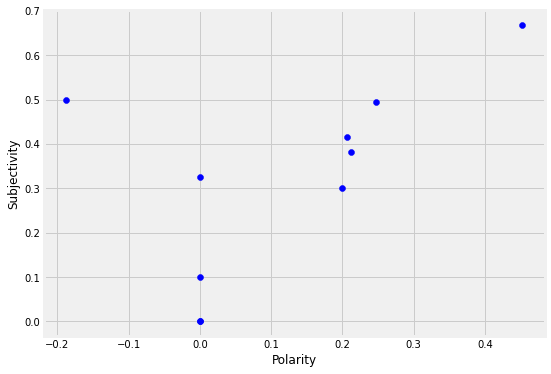

In [21]:
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show